<a href="https://colab.research.google.com/github/darstech/ML-Foundation/blob/main/2_linear_algebra_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch;
import numpy as np;
import tensorflow as tf;

In [2]:
u = torch.tensor([2, 5, -3])
u

tensor([ 2,  5, -3])

In [3]:
B = torch.tensor([[2, 0, -1],
                  [-2, 3, 1],
                  [0, 4, -1]])
B

tensor([[ 2,  0, -1],
        [-2,  3,  1],
        [ 0,  4, -1]])

In [4]:
u2 = torch.tensor([0, -4, 6])
u2

tensor([ 0, -4,  6])

In [5]:
I = torch.tensor([[1,0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [6]:
torch.matmul(I, u)

tensor([ 2,  5, -3])

In [7]:
torch.matmul(B, u)

tensor([ 7,  8, 23])

In [8]:
torch.matmul(B, u2)

tensor([ -6,  -6, -22])

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [9]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [10]:
import matplotlib.pyplot as plt


In [11]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

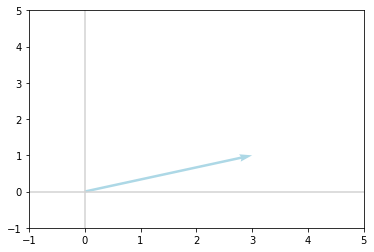

In [12]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [13]:
I = np.array([[1, 0],
              [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [14]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [15]:
v == Iv

array([ True,  True])

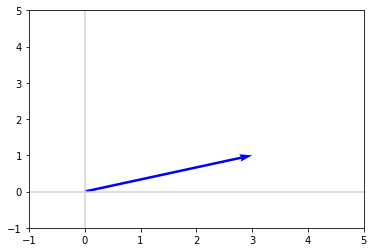

In [16]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [17]:
E = np.array([[1, 0],
              [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [18]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

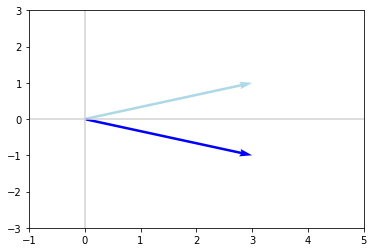

In [19]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [20]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [21]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

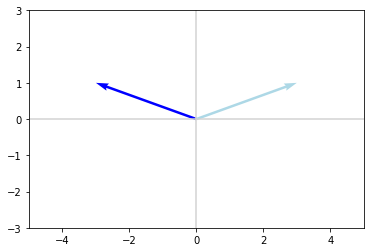

In [22]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-5, 5)
_ = plt.ylim(-3, 3)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [23]:
A = np.array([[-1, 4],
              [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [24]:
Av = np.dot(A, v)
Av

array([1, 4])

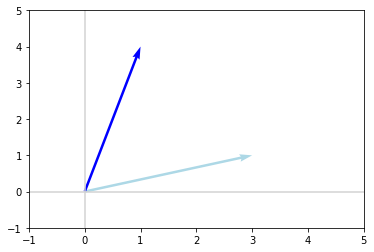

In [25]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

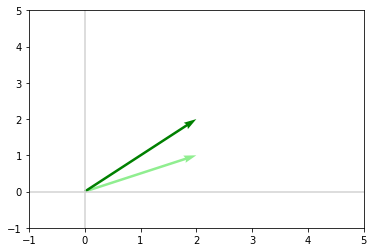

In [26]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [27]:
v, v2

(array([3, 1]), array([2, 1]))

In [28]:
# recall that we need to convert array to 2D to transpose into column, e.g. :
np.matrix(v).T

matrix([[3],
        [1]])

In [29]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [30]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [31]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [32]:
A

array([[-1,  4],
       [ 2, -2]])

In [33]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [43]:
#Function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
  return np.array(mtrx[:, clmn]).reshape(-1)

In [44]:
vectorfy(V, 0)


array([3, 1])

In [45]:
vectorfy(V, 0) == v

array([ True,  True])

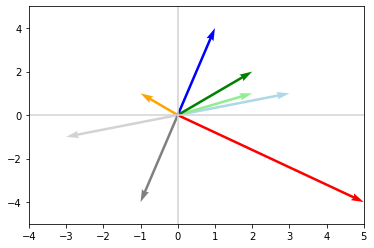

In [46]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
              vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
             ['lightblue', 'lightgreen', 'lightgray', 'orange', 'blue', 'green',
              'gray', 'red'])
plt.xlim(-4, 5)
_ = plt.ylim(-5, 5)

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [47]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [48]:
lambdas, V = np.linalg.eig(A)


The matrix contains as many eigenvectors as there are columns of A: 

In [52]:
V # Each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [53]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector:

In [54]:
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [55]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [56]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [57]:
lambduh * v

array([1.18031462, 0.70000958])

In [58]:
np.dot(lambduh, v)

array([1.18031462, 0.70000958])

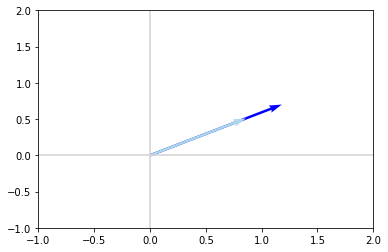

In [61]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A:

In [63]:
v2 = V[:, 1]
v2

array([-0.76454754,  0.64456735])

In [65]:
lambduh2 = lambdas[1]
lambduh2

-4.372281323269014

In [66]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [67]:
np.dot(lambduh2, v2)

array([ 3.34281692, -2.81822977])

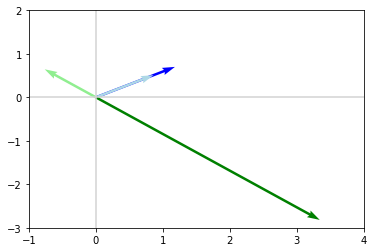

In [68]:
plot_vectors([Av, v, Av2, v2], ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using PyTorch eig() method, we can do exactly the same

In [69]:
A

array([[-1,  4],
       [ 2, -2]])

In [79]:
A_p = torch.tensor([[-1, 4],[2, -2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [82]:
eigens = torch.linalg.eig(A_p)
eigens

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [90]:
v_p = eigens.eigenvectors[:, 0].float() # Converting ComplexFloat to Float
v_p

tensor([0.8601, 0.5101])

In [91]:
lambda_p = eigens.eigenvalues[0].float()
lambda_p

tensor(1.3723)

In [92]:
 Av_p = torch.matmul(A_p, v_p)
 Av_p

tensor([1.1803, 0.7000])

In [95]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [98]:
v2_p = eigens.eigenvectors[:, 1].float()
v2_p

tensor([-0.7645,  0.6446])

In [99]:
lambda2_p = eigens.eigenvalues[1].float()
lambda2_p

tensor(-4.3723)

In [100]:
Av2_p = torch.matmul(A_p, v2_p)
Av2_p

tensor([ 3.3428, -2.8182])

In [102]:
lambda2_p * v2_p

tensor([ 3.3428, -2.8182])

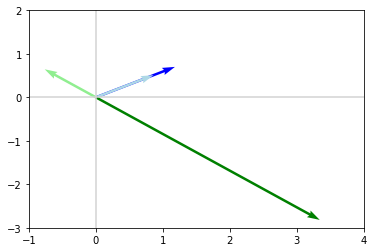

In [103]:
plot_vectors([Av_p, v_p, Av2_p, v2_p], ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)